Examples from X_train and X_val arrays

In [2]:
import os
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from sklearn.model_selection import train_test_split

filepath = "/faststorage/project/MutationAnalysis/Nimrod/data/splits/"
filenames = ["X_train_A", "y_train_A", "X_val_A", "y_val_A", "X_test_A", "y_test_A"]
X_train, y_train, X_val, y_val, X_test, y_test = [np.load(os.path.join(filepath, filename + ".npy")) for filename in filenames]

files = [X_train, y_train, X_val, y_val, X_test, y_test]
files = [torch.as_tensor(file, dtype=torch.float32) for file in files]
X_train, y_train, X_val, y_val, X_test, y_test = files

print("X_train example: ", X_train[0])
print("X_val example: ", X_val[0])

X_train example:  tensor([0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
        0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
        1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
        1., 0., 1., 0., 0., 0.])
X_val example:  tensor([1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
        1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 1., 0., 0., 0., 1.])


In [6]:
print("y_train example: ", y_train[0])
print("y_val example: ", y_val[0])

y_train example:  tensor([1., 0., 0., 0.])
y_val example:  tensor([1., 0., 0., 0.])


In [7]:
print(y_train.dtype, y_train.shape, y_train.unique())

torch.float32 torch.Size([1053563, 4]) tensor([0., 1.])


In [8]:
y_train = torch.argmax(y_train, dim=1).long()

In [9]:
print(y_train.dtype, y_train.shape, y_train.unique())

torch.int64 torch.Size([1053563]) tensor([0, 1, 2, 3])


Ratio of lengths is as it should be

In [22]:
print(len(X_train))
print(len(X_val))

1053563
225764


Checking out the dataframes the splits are created off of

In [ ]:
df = pd.read_csv("/home/grnimrod/MutationAnalysis/Nimrod/data/processed/DNM_15mer_v1_A.tsv", sep="\t")

# Keep central 3-mer
# df["context"] = df["context"].str[6:9]

train_dataset, temp_dataset = train_test_split(df, train_size=0.7, random_state=42, stratify=df["mut"])
val_dataset, test_dataset = train_test_split(temp_dataset, test_size=0.5, random_state=42, stratify=temp_dataset["mut"])

In [8]:
train_dataset[:5]

,chrom,pos,context,mut,type
1125865,chr5,98819681,GATGTTCATAGTAGA,0,A->A
35407,chr1,70770591,ATTAGAAAGAAATTA,1,A->G
1455202,chr9,19686590,TCTCATGATAGTGAG,0,A->A
970779,chr4,27478600,AGGAGAGAAAAAATA,0,A->A
87053,chr1,186956205,CTCTGGTATTGAATA,0,A->A


In [9]:
val_dataset[:5]

,chrom,pos,context,mut,type
126791,chr10,7503923,AACTGGGAGGCCGTT,0,A->A
743811,chr2,191217580,CATGCCAAGATATTA,0,A->A
942513,chr3,175200877,ATACTGTACTTATCA,1,A->G
850108,chr3,18357289,GAAATGTAATTCATG,0,A->A
616806,chr19,11128738,TTCTTATACTTATGA,0,A->A


Ratio of mutated to non-mutated sites is consistent across splits

In [ ]:
print(Counter(train_dataset["mut"]))

Counter({0: 910440, 1: 143123})


In [18]:
print(Counter(val_dataset["mut"]))

Counter({0: 195095, 1: 30669})


# Examine 3mer version of the data
How many unique 3mers are there and in what distribution?

In [3]:
filepath = "/faststorage/project/MutationAnalysis/Nimrod/data/splits/"
filenames = ["X_train_3mer_A", "y_train_3mer_A", "X_val_3mer_A", "y_val_3mer_A", "X_test_3mer_A", "y_test_3mer_A"]
X_train, y_train, X_val, y_val, X_test, y_test = [np.load(os.path.join(filepath, filename + ".npy")) for filename in filenames]

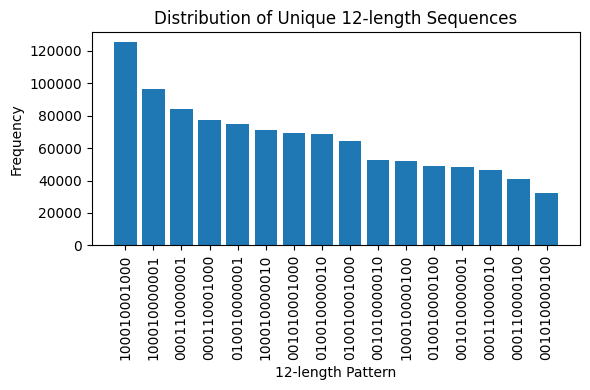

In [6]:
# Convert arrays to tuples and count
sequence_counts = Counter(tuple(x) for x in X_train)

# Sort by frequency
sorted_items = sorted(sequence_counts.items(), key=lambda item: item[1], reverse=True)
patterns, counts = zip(*sorted_items)

# Convert patterns to readable strings for labeling
labels = [''.join(map(str, p)) for p in patterns]

plt.figure(figsize=(6, 4))
plt.bar(range(len(counts)), counts)
plt.xticks(range(len(labels)), labels, rotation=90)
plt.xlabel("12-length Pattern")
plt.ylabel("Frequency")
plt.title("Distribution of Unique 12-length Sequences")
plt.tight_layout()
plt.show()


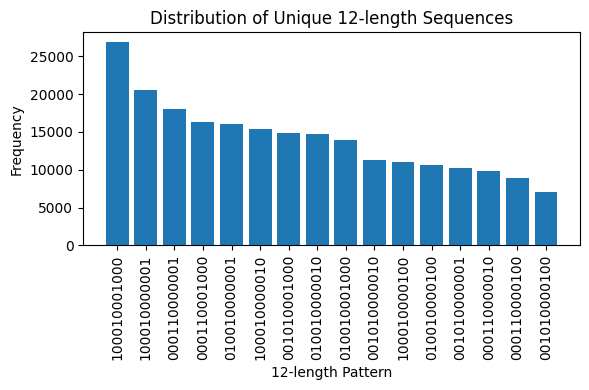

In [7]:
sequence_counts = Counter(tuple(x) for x in X_val)

# Sort by frequency
sorted_items = sorted(sequence_counts.items(), key=lambda item: item[1], reverse=True)
patterns, counts = zip(*sorted_items)

# Convert patterns to readable strings for labeling
labels = [''.join(map(str, p)) for p in patterns]

plt.figure(figsize=(6, 4))
plt.bar(range(len(counts)), counts)
plt.xticks(range(len(labels)), labels, rotation=90)
plt.xlabel("12-length Pattern")
plt.ylabel("Frequency")
plt.title("Distribution of Unique 12-length Sequences")
plt.tight_layout()
plt.show()

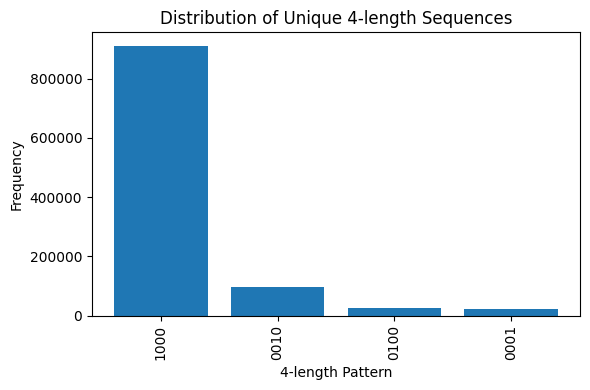

In [10]:
sequence_counts = Counter(tuple(x) for x in y_train)

# Sort by frequency
sorted_items = sorted(sequence_counts.items(), key=lambda item: item[1], reverse=True)
patterns, counts = zip(*sorted_items)

# Convert patterns to readable strings for labeling
labels = [''.join(map(str, p)) for p in patterns]

plt.figure(figsize=(6, 4))
plt.bar(range(len(counts)), counts)
plt.xticks(range(len(labels)), labels, rotation=90)
plt.xlabel("4-length Pattern")
plt.ylabel("Frequency")
plt.title("Distribution of Unique 4-length Sequences")
plt.tight_layout()
plt.show()

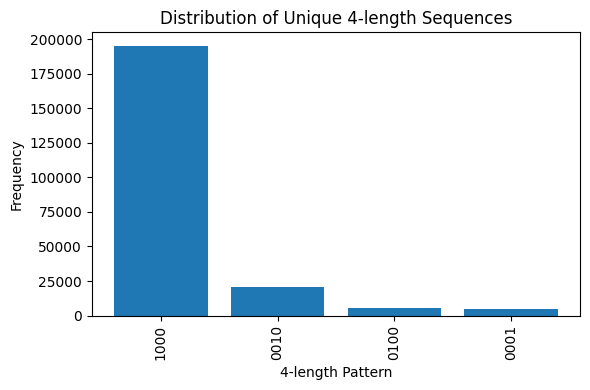

In [12]:
sequence_counts = Counter(tuple(x) for x in y_val)

# Sort by frequency
sorted_items = sorted(sequence_counts.items(), key=lambda item: item[1], reverse=True)
patterns, counts = zip(*sorted_items)

# Convert patterns to readable strings for labeling
labels = [''.join(map(str, p)) for p in patterns]

plt.figure(figsize=(6, 4))
plt.bar(range(len(counts)), counts)
plt.xticks(range(len(labels)), labels, rotation=90)
plt.xlabel("4-length Pattern")
plt.ylabel("Frequency")
plt.title("Distribution of Unique 4-length Sequences")
plt.tight_layout()
plt.show()

In [14]:
df = pd.read_csv("/home/grnimrod/MutationAnalysis/Nimrod/data/processed/DNM_15mer_v1_A.tsv", sep="\t")

df["context"] = df["context"].str[6:9]

df.to_csv("/home/grnimrod/MutationAnalysis/Nimrod/data/processed/DNM_3mer_A.tsv", sep="\t")

## How many combinations of feature-label pairs do we have in the data?

In [15]:
df = pd.read_csv("/home/grnimrod/MutationAnalysis/Nimrod/data/processed/DNM_3mer_A.tsv", sep="\t")

In [16]:
list_of_unique_pairs = []

for row in range(len(df)):
    tup = (df.iloc[row]["context"], df.iloc[row]["type"][-1])
    if tup not in list_of_unique_pairs:
        list_of_unique_pairs.append(tup)

In [17]:
len(list_of_unique_pairs)

64

64 pairs are represented, which is unsurprisingly all possible combinations of 16 different features and 4 different labels. The question now is whether they are uniformly distributed or not

In [29]:
temp_df = pd.DataFrame(df["context"])

temp_df["type"] = df["type"].str[-1]

In [30]:
temp_df.head()

,context,type
0,TAG,A
1,CAT,A
2,GAT,A
3,AAT,A
4,AAC,A


In [37]:
counts = temp_df.groupby(["context", "type"]).value_counts().unstack(fill_value=0)
counts

type,A,C,G,T
context,,,,
AAA,163089,4614,8668,2721
AAC,64850,1472,6606,1456
AAG,90669,2584,6880,1598
AAT,114041,2734,18540,2775
CAA,82669,2781,5614,1325
CAC,61188,2009,5518,1534
CAG,85235,2598,8288,1792
CAT,82307,3221,17789,3553
GAA,89987,2150,4891,1715


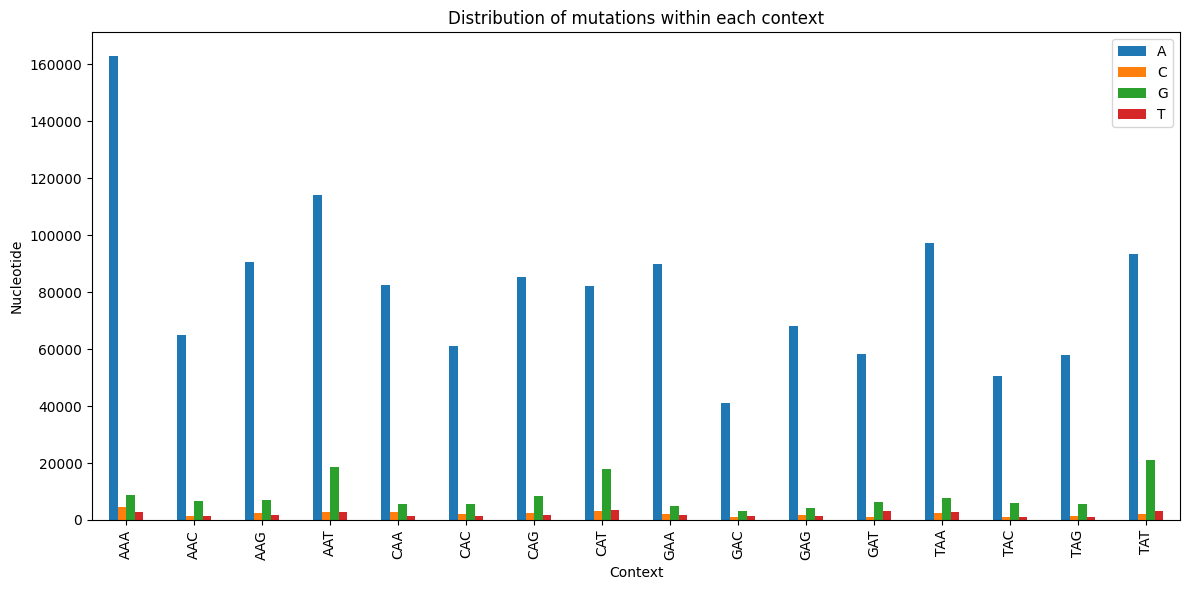

In [39]:
counts.plot(kind="bar", figsize=(12, 6))

plt.title("Distribution of mutations within each context")
plt.xlabel("Context")
plt.ylabel("Nucleotide")
plt.legend()
plt.tight_layout()

plt.show()

# Examine reduced 3-mer version (current "experiments")

In [14]:
df = pd.read_csv("/home/grnimrod/MutationAnalysis/Nimrod/data/processed/DNM_15mer_v1_A.tsv", sep="\t")

df["context"] = df["context"].str[6:9]

df_nonmut = df[df["mut"] == 0]
df_mut = df[df["mut"] == 1]

df_nonmut_reduced, _ = train_test_split(df_nonmut, train_size=0.2, random_state=42, stratify=df_nonmut["context"])

df = pd.concat([df_mut, df_nonmut_reduced], axis=0)

In [15]:
df.to_csv("/home/grnimrod/MutationAnalysis/Nimrod/data/processed/DNM_3mer_reduced_A.tsv", sep="\t")

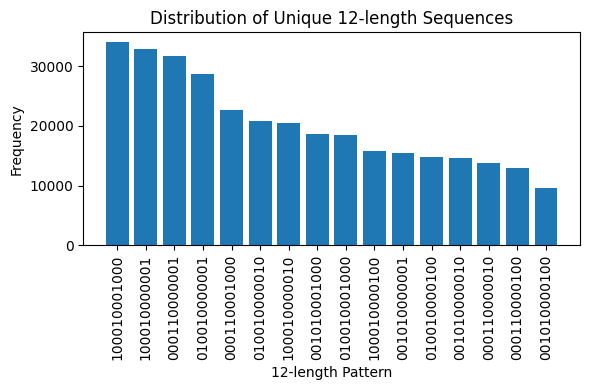

In [3]:
filepath = "/faststorage/project/MutationAnalysis/Nimrod/data/splits/"
filenames = ["X_train_experiments_A", "y_train_experiments_A", "X_val_experiments_A", "y_val_experiments_A", "X_test_experiments_A", "y_test_experiments_A"]
X_train, y_train, X_val, y_val, X_test, y_test = [np.load(os.path.join(filepath, filename + ".npy")) for filename in filenames]

# Convert arrays to tuples and count
sequence_counts = Counter(tuple(x) for x in X_train)

# Sort by frequency
sorted_items = sorted(sequence_counts.items(), key=lambda item: item[1], reverse=True)
patterns, counts = zip(*sorted_items)

# Convert patterns to readable strings for labeling
labels = [''.join(map(str, p)) for p in patterns]

plt.figure(figsize=(6, 4))
plt.bar(range(len(counts)), counts)
plt.xticks(range(len(labels)), labels, rotation=90)
plt.xlabel("12-length Pattern")
plt.ylabel("Frequency")
plt.title("Distribution of Unique 12-length Sequences")
plt.tight_layout()
plt.show()

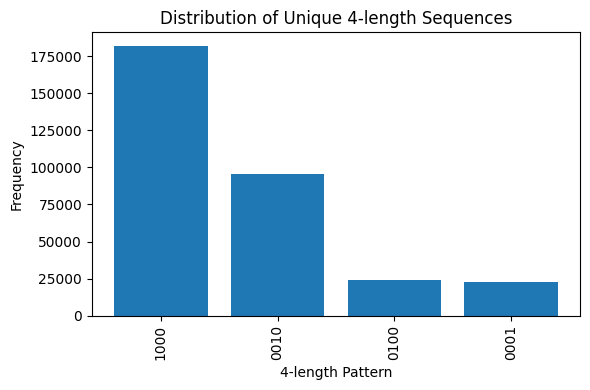

In [4]:
sequence_counts = Counter(tuple(x) for x in y_train)

# Sort by frequency
sorted_items = sorted(sequence_counts.items(), key=lambda item: item[1], reverse=True)
patterns, counts = zip(*sorted_items)

# Convert patterns to readable strings for labeling
labels = [''.join(map(str, p)) for p in patterns]

plt.figure(figsize=(6, 4))
plt.bar(range(len(counts)), counts)
plt.xticks(range(len(labels)), labels, rotation=90)
plt.xlabel("4-length Pattern")
plt.ylabel("Frequency")
plt.title("Distribution of Unique 4-length Sequences")
plt.tight_layout()
plt.show()